In [7]:
#To store the data on a local SQL server
#Creating a SQL Database, and a table

import sqlite3
import smtplib 
from email.mime.text import MIMEText

import feedparser

db_connection = sqlite3.connect('CBC_RSSFeed.db')
db = db_connection.cursor()
db.execute('CREATE TABLE IF NOT EXISTS CBC (title TEXT, date TEXT, url TEXT)')

In [8]:
#Checking if the article we are importing exists in the database or not

def article_is_not_db(article_title, article_date, article_url):
    """ Check if a given pair of article title and date
    is in the database.
    Args:
        article_title (str): The title of an article
        article_date  (str): The publication date of an article
    Return:
        True if the article is not in the database
        False if the article is already present in the database
    """
    db.execute("SELECT * from CBC WHERE title=? AND date=? AND url=?", (article_title, article_date, article_url))
    if not db.fetchall():
        return True
    else:
        return False

In [9]:
#Function for Adding the article in the database if it doesn't exist

def add_article_to_db(article_title, article_date,article_url):
    """ Add a new article title and date to the database
    Args:
        article_title (str): The title of an article
        article_date (str): The publication date of an article
    """
    db.execute("INSERT INTO CBC VALUES (?,?,?)", (article_title, article_date, article_url))
    db_connection.commit()

In [10]:
#Creating a read function & Calling the 'add' article function created earlier

def read_article_feed():
    """ Get articles from RSS feed """
    feed = feedparser.parse('https://www.cbc.ca/cmlink/rss-canada')
    for article in feed['entries']:
        if article_is_not_db(article['title'], article['published'],article['link']):
            add_article_to_db(article['title'], article['published'],article['link'])

if __name__ == '__main__':
    read_article_feed()
    db_connection.close()

In [11]:
#import library
import requests
from bs4 import BeautifulSoup

#enter URL
url = "https://www.cbc.ca/cmlink/rss-canada"

resp = requests.get(url)

soup = BeautifulSoup(resp.content, features="xml")

In [12]:
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<rss version="2.0" xmlns:cbc="https://www.cbc.ca/rss/cbc">
 <channel>
  <title>
   CBC | Canada News
  </title>
  <link>
   http://www.cbc.ca/canada/?cmp=rss
  </link>
  <description>
   FOR PERSONAL USE ONLY
  </description>
  <language>
   en-ca
  </language>
  <lastBuildDate>
   Thu, 14 Jan 2021 20:46:36 EST
  </lastBuildDate>
  <copyright>
   Copyright: (C) Canadian Broadcasting	Corporation,							http://www.cbc.ca/aboutcbc/discover/termsofuse.html#Rss
  </copyright>
  <docs>
   http://www.cbc.ca/rss/
  </docs>
  <image>
   <title>
    CBC.ca
   </title>
   <url>
    https://www.cbc.ca/rss/image/cbc_144.gif
   </url>
   <link>
    https://www.cbc.ca/news/?cmp=rss
   </link>
  </image>
  <item cbc:deptid="2.643" cbc:syndicate="true" cbc:type="story">
   <title>
    Critics denounce 'climate-change denialism' reports commissioned by Alberta inquiry
   </title>
   <link>
    https://www.cbc.ca/news/canada/edmonton/alberta-inquiry-reports-commissi

In [13]:
items = soup.findAll('item')

In [14]:
print(items)

[<item cbc:deptid="2.643" cbc:syndicate="true" cbc:type="story">
<title>Critics denounce 'climate-change denialism' reports commissioned by Alberta inquiry</title>
<link>https://www.cbc.ca/news/canada/edmonton/alberta-inquiry-reports-commissioned-critics-1.5873580?cmp=rss</link>
<guid isPermaLink="false">1.5873580</guid>
<pubDate>Thu, 14 Jan 2021 16:11:28 EST</pubDate>
<author>Jennie Russell, Charles Rusnell</author>
<category>News/Canada/Edmonton</category>
<description>
        
                        &lt;img src='https://i.cbc.ca/1.5364270.1610655742!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_460/steve-allan.jpg' alt='Steve Allan' width='460' title='As part of his inquiry into alleged foreign-funded campaigns against Alberta&amp;#39;s energy industry, commissioner Steve Allan commissioned reports that critics say are full of climate-change denialism and conspiracy theories.' height='259' /&gt;                &lt;p&gt;A $3.5-million Alberta government public inquiry into al

In [15]:
len(items)

20

In [16]:
#declare empty var to append data
news_items = []

In [17]:
for item in items:
    news_item = {}
    news_item['title'] = item.title.text
    news_item['description'] = item.description.text
    news_item['link'] = item.link.text
    news_item['pubDate'] = item.pubDate.text
    news_items.append(news_item)

In [18]:
from textblob import TextBlob
import nltk
from newspaper import Article

In [19]:
#Get the article from Rss feed 
url = 'https://www.cbsnews.com/news/adidas-invest-120-million-black-communities/'
article = Article(url)

In [20]:
# Do some NLP
article.download() #Downloads the link’s HTML content
article.parse() #Parse the article
nltk.download('punkt')#1 time download of the sentence tokenizer
article.nlp()#  Keyword extraction wrapper

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12499\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:

#Get the summary of the article
text = article.summary

#print text
print(text)

"First, we need to give credit where it's long overdue," Adidas tweeted.
"The success of Adidas would be nothing without Black athletes, Black artists, Black employees and Black consumers."
— adidas (@adidas) June 10, 2020Rapper Kayne West, singer Beyoncé Knowles-Carter and Portland Trailblazers guard Damian Lillard have all inked partnership deals with Adidas in recent years.
The moves announced Wednesday come after some Adidas employees reportedly accused the company of marginalizing black workers.
"For most of you, this message is too little, too late," Adidas tweeted.


In [22]:

#Create Text Blob Object
#NOTE: You can treat TextBlob objects as if they were Python strings that learned how to do Natural Language Processing.
obj = TextBlob(text)

#returns the sentiment of text
#by returning a value between -1.0 and 1.0
sentiment = obj.sentiment.polarity
print(sentiment)

-0.026736111111111103


In [23]:

#Print if the text was neutral, positive, or negative
if sentiment == 0:
  print('The text is positive')
elif sentiment > 0:
  print('The text is negative')
else:
  print('The text is neutral')

The text is neutral


In [27]:
with open("C:\\Users\\12499\\Desktop\\post1.txt", 'r') as fh:  
    reviews = fh.readlines()

In [28]:
%matplotlib inline
print('{:40} : {:10} : {:10}'.format("Review", "Polarity", "Subjectivity") )

for review in reviews:
    #Find sentiment of a review
    sentiment = TextBlob(review)
    #Print individual sentiments
    print('{:40} :   {: 01.2f}    :   {:01.2f}'.format(review[:40]\
                , sentiment.polarity, sentiment.subjectivity) )

Review                                   : Polarity   : Subjectivity
"First, we need to give credit where it' :    0.10    :   0.37
"The success of Adidas would be nothing  :   -0.07    :   0.35
â€” adidas (@adidas) June 10, 2020Rapper :    0.00    :   0.25
The moves announced Wednesday come after :   -0.17    :   0.43
"For most of you, this message is too li :    0.00    :   0.53


Final summarized counts : [4, 0, 1]

 Pie Representation 
-------------------


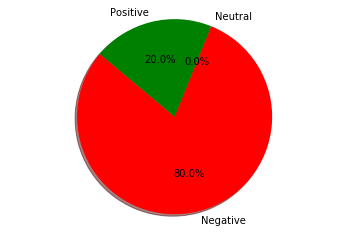

In [29]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each review
for review in reviews:
    sentiment = TextBlob(review)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["Red","Blue","Green"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()